### Correlation between Model Multiplicity and Mean of Absolute Differences

### Import libraries and set plotting style

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from plot import *


 ### Feature Numbers and Model Types

In [2]:
feature_numbers = ['9', '22', '30']  
model_types = ['LP','RP','LB','RB']  

### Load CSV files

In [3]:
df_predictions = load_and_clean_predictions('unemployment','predictions',feature_numbers, model_types, data_path='../predictions/')

# 12 minutes to run

Loaded file: ../predictions/unemployment_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/unemployment_predictions_9RP_nodate.csv for model 9RP
Loaded file: ../predictions/unemployment_predictions_9LB_nodate.csv for model 9LB
Loaded file: ../predictions/unemployment_predictions_9RB_nodate.csv for model 9RB
Loaded file: ../predictions/unemployment_predictions_22LP_nodate.csv for model 22LP
Loaded file: ../predictions/unemployment_predictions_22RP_1128_0647.csv for model 22RP
Loaded file: ../predictions/unemployment_predictions_22LB_1128_1041.csv for model 22LB
Loaded file: ../predictions/unemployment_predictions_22RB_nodate.csv for model 22RB
Loaded file: ../predictions/unemployment_predictions_30LP_nodate.csv for model 30LP
Loaded file: ../predictions/unemployment_predictions_30RP_nodate.csv for model 30RP
Loaded file: ../predictions/unemployment_predictions_30LB_nodate.csv for model 30LB
Loaded file: ../predictions/unemployment_predictions_30RB_1128_0841.csv for mo

### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}

In [4]:
mean_of_abs_diff_df = {}
suffixes = ['LM', 'RM', 'LM', 'RM']

for model_type, suffix in zip(model_types, suffixes):
    abs_diff_9vs30 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['9'][model_type], 
            df_predictions['30'][model_type], 
            substring_1=f'9{suffix}', 
            substring_2=f'30{suffix}'
        )
    )['mean']
    
    abs_diff_22vs30 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['22'][model_type], 
            df_predictions['30'][model_type], 
            substring_1=f'22{suffix}', 
            substring_2=f'30{suffix}'
        )
    )['mean']
    
    mean_of_abs_diff_df[model_type] = pd.DataFrame({
        'abs_diff_9vs30': abs_diff_9vs30,
        'abs_diff_22vs30': abs_diff_22vs30
    })

combined_mean_of_abs_diff_df = pd.concat(mean_of_abs_diff_df, axis=1)

#print(combined_mean_of_abs_diff_df)
# 12 minutes to run

### Probabilities

Correlation between Model Multiplicity of Lower Feature Set Model and Absolute Mean Differences
- (9LP vs. 30LP) and 9LP Model Multiplicity
- (9RP vs. 30RP) and 9RP Model Multiplicity 

- (22LP vs. 30LP) and 22LP Model Multiplicity
- (22RP vs. 30RP) and 22RP Model Multiplicity

Correlation between Model Multiplicity (9LP) and Mean of Absolute Differences (9LP vs. 30LP)
Correlation coefficient: 0.13610888416628897


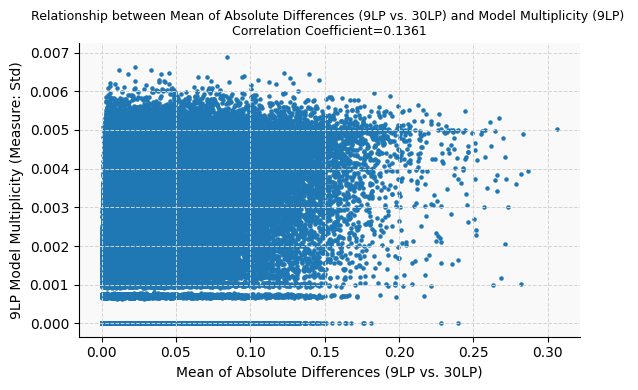

Correlation between Model Multiplicity (9RP) and Mean of Absolute Differences (9RP vs. 30RP)
Correlation coefficient: 0.3402460464397703


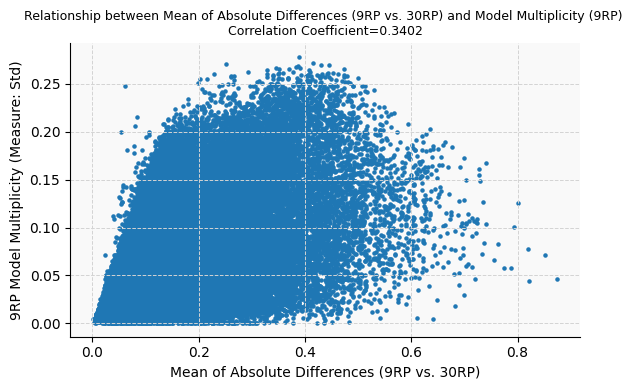

Correlation between Model Multiplicity (22LP) and Mean of Absolute Differences (22LP vs. 30LP)
Correlation coefficient: 0.13367437918295633


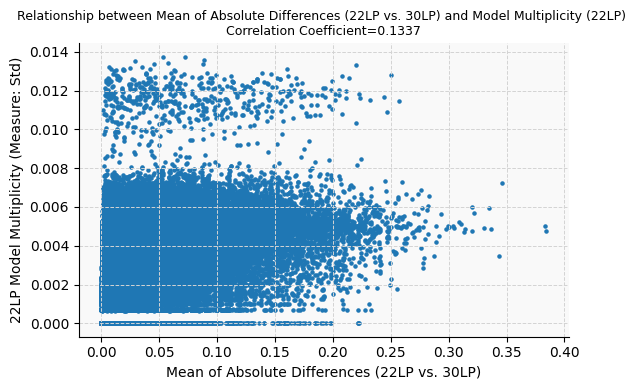

Correlation between Model Multiplicity (22RP) and Mean of Absolute Differences (22RP vs. 30RP)
Correlation coefficient: 0.36251547772362547


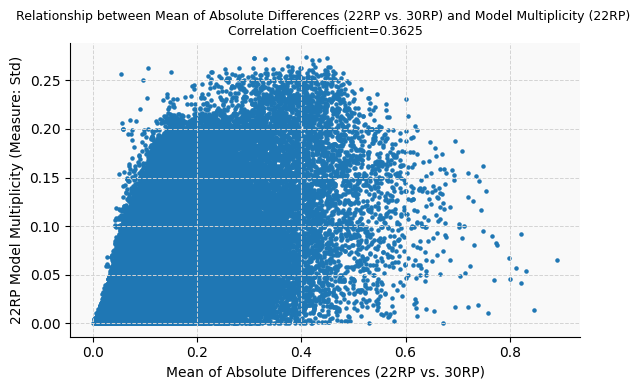

In [5]:
model_types_P = ['LP', 'RP']

for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type,
        std = 'std',
        abs_diff_keys=['9vs30'], 
        comparison_labels=[f'9{model_type} vs. 30{model_type}'],
        primary_model='9',  
        dynamic_base_model=False 
    )

for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type,
        std = 'std',
        abs_diff_keys=['22vs30'], 
        comparison_labels=[f'22{model_type} vs. 30{model_type}'],
        primary_model='22', 
        dynamic_base_model=False 
    )


Correlation between Model Multiplicity (9LP) and Mean of Absolute Differences (9LP vs. 30LP)
Correlation coefficient: 0.13610888416628897


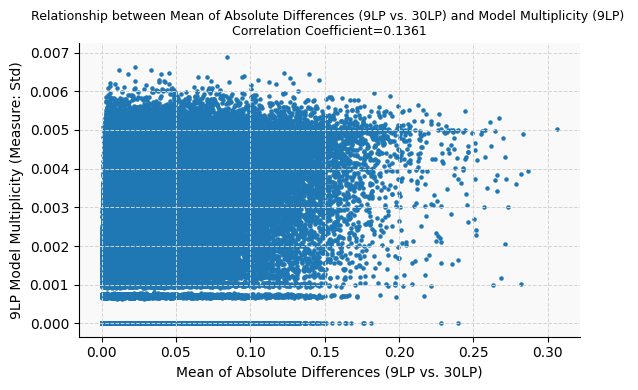

Correlation between Model Multiplicity (9RP) and Mean of Absolute Differences (9RP vs. 30RP)
Correlation coefficient: 0.3402460464397703


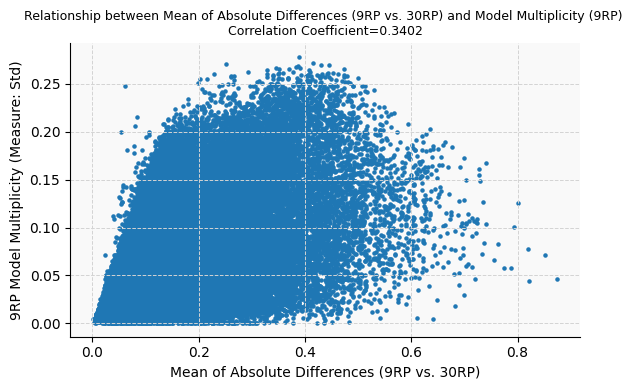

Correlation between Model Multiplicity (22LP) and Mean of Absolute Differences (22LP vs. 30LP)
Correlation coefficient: 0.13367437918295633


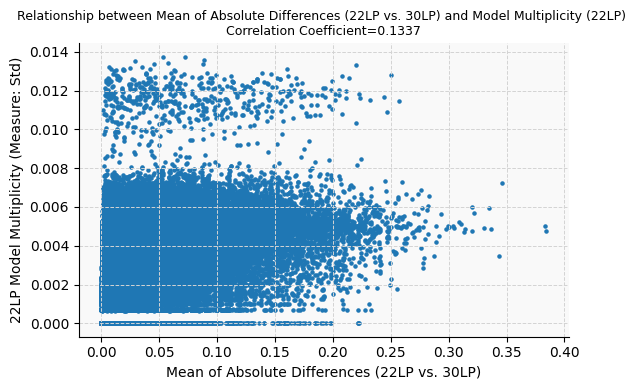

Correlation between Model Multiplicity (22RP) and Mean of Absolute Differences (22RP vs. 30RP)
Correlation coefficient: 0.36251547772362547


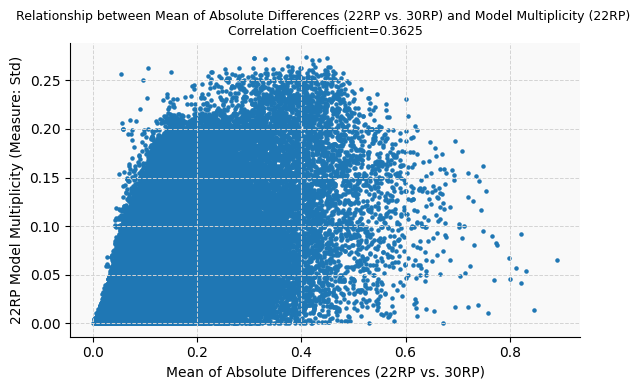

In [6]:
model_types_P = ['LP', 'RP']
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['9vs30'], 
        comparison_labels=[f'9{model_type} vs. 30{model_type}'],
        primary_model='9',  
        dynamic_base_model=False 
    )

model_types_P = ['LP', 'RP']
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['22vs30'], 
        comparison_labels=[f'22{model_type} vs. 30{model_type}'],
        primary_model='22', 
        dynamic_base_model=False 
    )

# 5 minutes to run

Correlation between Model Multiplicity of Higher Feature Set Model and Absolute Mean Differences
- (9LP vs. 30LP) and 30LP Model Multiplicity
- (9RP vs. 30RP) and 30RP Model Multiplicity 

- (22LP vs. 30LP) and 30LP Model Multiplicity
- (22RP vs. 30RP) and 30RP Model Multiplicity 

Correlation between Model Multiplicity (30LP) and Mean of Absolute Differences (9LP vs. 30LP)


Correlation coefficient: 0.28208738543658407


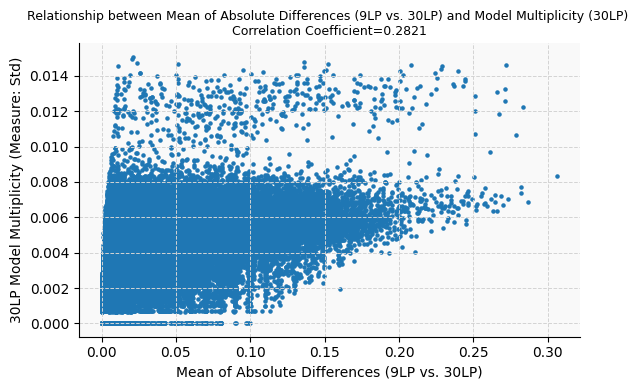

Correlation between Model Multiplicity (30RP) and Mean of Absolute Differences (9RP vs. 30RP)
Correlation coefficient: 0.33089796512760583


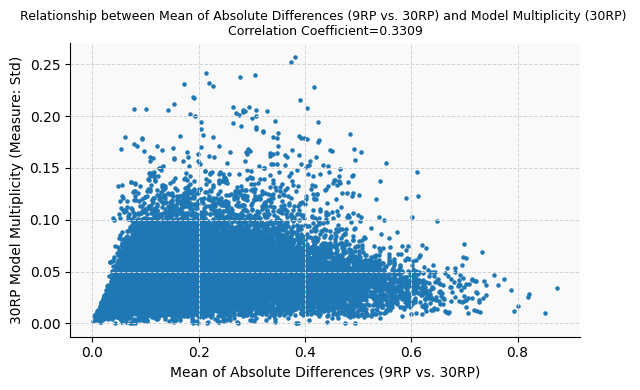

Correlation between Model Multiplicity (30LP) and Mean of Absolute Differences (22LP vs. 30LP)
Correlation coefficient: 0.20345852168300818


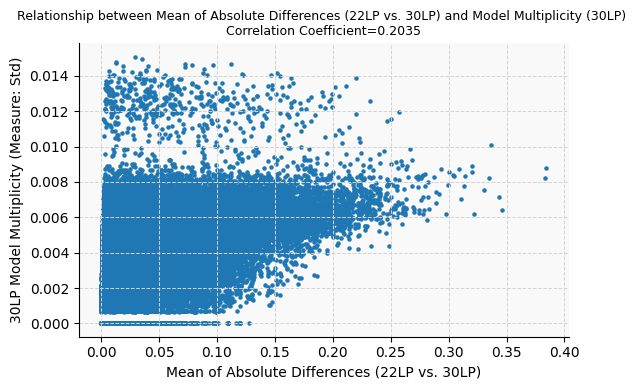

Correlation between Model Multiplicity (30RP) and Mean of Absolute Differences (22RP vs. 30RP)
Correlation coefficient: 0.3320153397875267


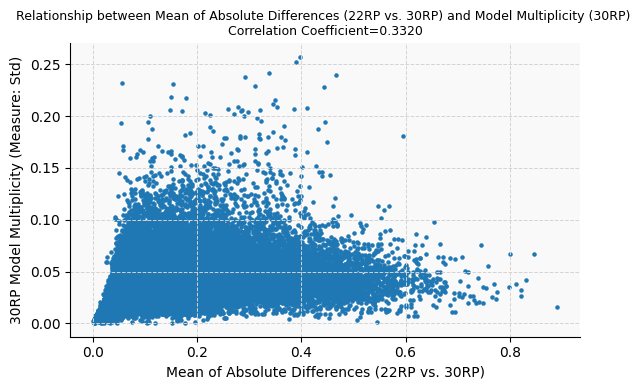

In [7]:
model_types_P = ['LP', 'RP']
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['9vs30'], 
        comparison_labels=[f'9{model_type} vs. 30{model_type}'],
        primary_model='9', 
        dynamic_base_model=True
    )

model_types_P = ['LP', 'RP']
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['22vs30'], 
        comparison_labels=[f'22{model_type} vs. 30{model_type}'],
        primary_model='22', 
        dynamic_base_model=True
    )


### Binary values

### Agreement (Model Multiplicity Measure)

1. How many models predict 1:
\begin{align}
S_1 = \sum_{i=1}^{N} p_i 
\end{align}

2. How many models predict 0:
\begin{align}
S_0 = N - S_1 
\end{align}

3. Proportion of models that agree on the majority prediction:
\begin{align}
\text{Agreement} = \max\left( \frac{S_1}{N}, \frac{S_0}{N} \right)
\end{align}

In [8]:
model_multiplicity_LB = {}
model_multiplicity_RB = {}


for feature_number in feature_numbers:
    model_multiplicity_LB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='LB')
    model_multiplicity_RB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='RB')


#  almost 3 minutes to run

   ID     S1     S0    N  Agreement
0   0  210.0    0.0  210        1.0
1   1  191.0    0.0  191        1.0
2   4  213.0    0.0  213        1.0
3   5    0.0  205.0  205        1.0
4   8  209.0    0.0  209        1.0
Minimum agreement value:  0.5024630541871922
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   0  126.0   84.0  210   0.600000
1   1  189.0    2.0  191   0.989529
2   4  104.0  109.0  213   0.511737
3   5  167.0   38.0  205   0.814634
4   8   45.0  164.0  209   0.784689
Minimum agreement value:  0.5
Minimum agreement value count:  26
   ID     S1     S0    N  Agreement
0   0  210.0    0.0  210        1.0
1   1  191.0    0.0  191        1.0
2   2  213.0    0.0  213        1.0
3   3    0.0  205.0  205        1.0
4   4  209.0    0.0  209        1.0
Minimum agreement value:  0.5024390243902439
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   0  186.0   24.0  210   0.885714
1   1   32.0  159.0  191   0.832461
2   4   73.0  140.0  

In [9]:
# Check and print lengths 
print("Lengths of model_multiplicity_LB and model_multiplicity_RB dataframes:")
for feature_number in feature_numbers:
    lb_length = len(model_multiplicity_LB[feature_number])
    rb_length = len(model_multiplicity_RB[feature_number])
    print(f"Feature {feature_number}: LB length = {lb_length}, RB length = {rb_length}")
    if lb_length != rb_length:
        print(f"Length mismatch for feature {feature_number} (LB: {lb_length}, RB: {rb_length})")


Lengths of model_multiplicity_LB and model_multiplicity_RB dataframes:
Feature 9: LB length = 78294, RB length = 78294
Feature 22: LB length = 78294, RB length = 78294
Feature 30: LB length = 78294, RB length = 78294


Correlation: -0.2360


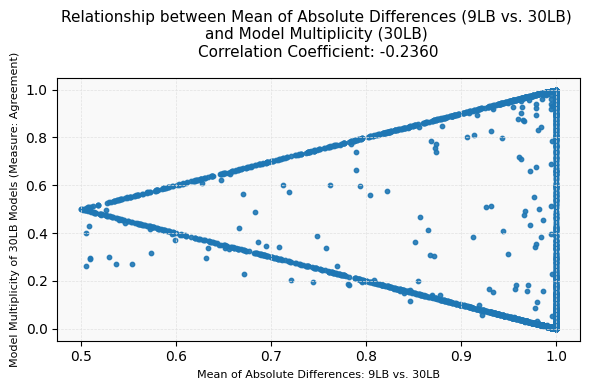

Correlation: -0.2410


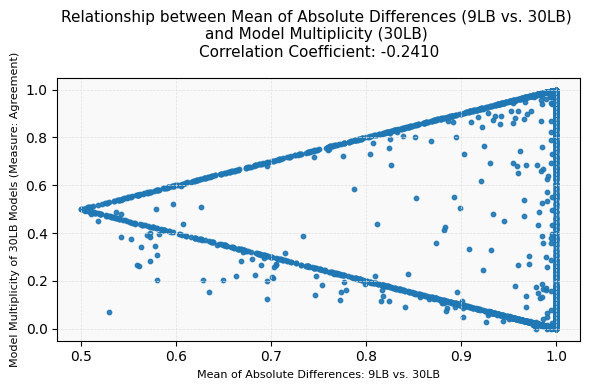

Correlation: -0.3360


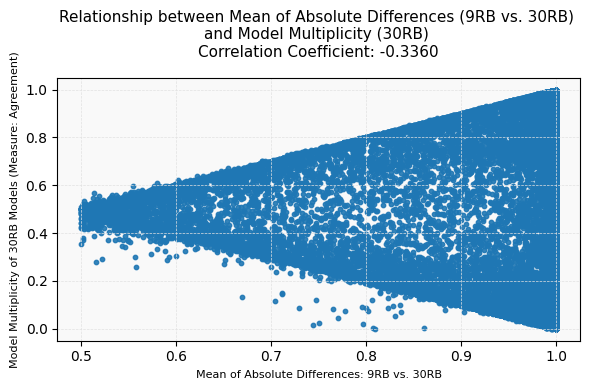

Correlation: -0.3631


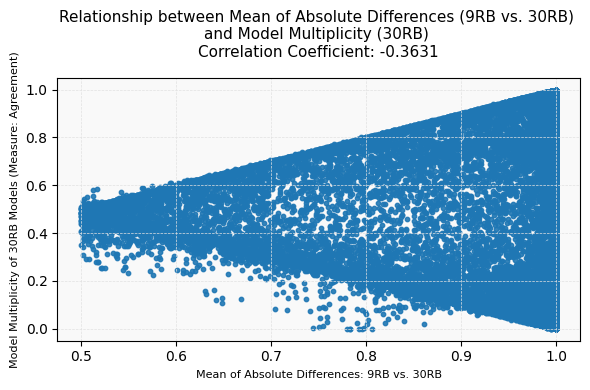

In [10]:
model_types = ['LB', 'RB']
comparison_keys = {
    '9vs30': '30',  
    '22vs30': '30'  
}

correlations = {}

for model_type in model_types:
    for comparison_key, base_model in comparison_keys.items():
        model_multiplicity = model_multiplicity_LB if model_type == 'LB' else model_multiplicity_RB
        
        correlations[f'{comparison_key}_{model_type}'] = correl_agreement_differences(
            model_multiplicity=model_multiplicity[base_model],
            combined_mean_of_abs_diff_df=combined_mean_of_abs_diff_df,
            model_type=model_type,
            base_model=base_model, 
            comparison_key=comparison_key
        )